### This notebook does the following analysis:

The number of clicks on recommendations at each position

### Import

In [4]:
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
action_data_position = pd.read_csv('../Clean_Data/log_trailer_actions_sessionIds.csv')

In [7]:
# Get the algorithm assignment
expt_trailer = pd.read_csv('../Data/expt_trailer.csv', sep=',')
alg_assignment = expt_trailer[['userId','loginId','recommenderId']]
alg_assignment.sort_values(by='recommenderId').shape


(510939, 3)

In [8]:
# Trailers recommended by an algorithm and played, excluding 'PlayedFromYoutubePlayer'
total_played = action_data_position[action_data_position['action'].isin(["PlayedFromLaunch","PlayedFromNext", "PlayedFromRecommendation", "PlayedFromPrevious"])]


In [9]:
# Merge total_played with algorithm assignment
total_played_alg = pd.merge(total_played, alg_assignment, on=['loginId','userId'], how='left')
# Drop na values
total_played_alg2 = total_played_alg.dropna(subset=['recommenderId']).copy()

In [10]:
total_played_alg2.count()

Unnamed: 0       166959
userId           166959
loginId          166959
movieId          166959
action           166959
tstamp           166959
position         166959
sessionIds       166959
recommenderId    166959
dtype: int64

In [11]:
totalclick_position_count = total_played_alg2.groupby("position").count().reset_index()[['position','userId']]

In [12]:
totalclick_position_count['frequency']=totalclick_position_count['userId']/166959

In [18]:
totalclick_position_count

,position,userId,frequency
0,0,158192,0.947490
1,1,1582,0.009475
2,2,953,0.005708
3,3,780,0.004672
4,4,775,0.004642
5,5,685,0.004103
6,6,676,0.004049
7,7,642,0.003845
8,8,600,0.003594
9,9,509,0.003049


#### Exclude position 0

In [19]:
recclick_position_count_exclude0 = totalclick_position_count[1:].copy()
recclick_position_count_exclude0.sum()

position       91.00000
userId       8767.00000
frequency       0.05251
dtype: float64

In [20]:
recclick_position_count_exclude0['Frequency']=recclick_position_count_exclude0['userId']/8767
recclick_position_count_exclude0

,position,userId,frequency,Frequency
1,1,1582,0.009475,0.180449
2,2,953,0.005708,0.108703
3,3,780,0.004672,0.088970
4,4,775,0.004642,0.088400
5,5,685,0.004103,0.078134
6,6,676,0.004049,0.077107
7,7,642,0.003845,0.073229
8,8,600,0.003594,0.068438
9,9,509,0.003049,0.058059
10,10,417,0.002498,0.047565


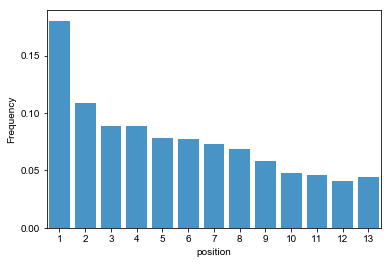

In [21]:
# Visualize the distribution
# sns.set(color_codes=False)
f, ax = plt.subplots(1)
sns.set(font_scale=1.5) 
sns.set_style("white")
ax = sns.barplot(x="position", y="Frequency", data=recclick_position_count_exclude0,color='#3498db')


In [27]:
def savefig(figure, name):
    for fmt in ['pdf', 'eps']:
        fn = "../Graphs/{}.{}".format(name, fmt)
        figure.savefig(fn, format=fmt, dpi=300, bbox_inches='tight', pad_inches=0.1, frameon=True)
        print("saved figure {} as {}".format(figure, fn))

In [28]:
savefig(f, "clicks_on_position")

saved figure Figure(432x288) as ../Graphs/clicks_on_position.pdf
saved figure Figure(432x288) as ../Graphs/clicks_on_position.eps
